In [1]:
import os
from dotenv import load_dotenv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import logging

In [135]:
load_dotenv()
base_dir = os.getenv("BASE_DIR")
scratch_dir = os.getenv("SCRATCH_DIR")

if not base_dir:
    logging.error("BASE_DIR environment variable not set")
    raise EnvironmentError("BASE_DIR environment variable not set")

data_dir = os.path.join(scratch_dir, "data")
behav_dir = os.path.join(data_dir, "behav")
stimuli_dir = os.path.join(data_dir, "stimuli")cd 
output_dir = os.path.join(scratch_dir, "output")
figure_dir = os.path.join(scratch_dir, "figures")
os.makedirs(figure_dir, exist_ok=True)

In [67]:
n_trs = 465
event_agree_df = pd.read_pickle(os.path.join(output_dir, "behav_results", "agreement_eventseg_filtered.pkl"))
event_agree_unfiltered_df = pd.read_pickle(os.path.join(output_dir, "behav_results", "agreement_eventseg.pkl"))
event_agree = np.zeros(n_trs+1)
event_agree[event_agree_df["TR"].values.astype(int)] = event_agree_df["agreement"].values

In [18]:
button_file = os.path.join(output_dir, "behav_results", "individual_response_eventseg.pkl")
button_df = pd.read_pickle(button_file)

# Load in the binary button presses
buttons = np.vstack(button_df["binary_response"].to_list())
n_sub, n_trs = buttons.shape
# # Compute proportion agreement
# event_agree = np.mean(buttons, axis=0)

In [7]:
affair_file = os.path.join(output_dir, "behav_results", "individual_response_evidence_affair.pkl")
paranoia_file = os.path.join(output_dir, "behav_results", "individual_response_evidence_paranoia.pkl")

affair_df = pd.read_pickle(affair_file)
paranoia_df = pd.read_pickle(paranoia_file)

affair = np.vstack(affair_df["binary_response"].to_list())
paranoia = np.vstack(paranoia_df["binary_response"].to_list())

aff_agree = np.mean(affair, axis=0) 
par_agree = np.mean(paranoia, axis=0)

n_affair, n_paranoia = affair.shape[0], paranoia.shape[0]

In [42]:
event_boundary_df = pd.read_csv(os.path.join(output_dir, "behav_results", "event_df_prom_filtered_023.csv"))
boundaries = event_boundary_df['boundary'].values.astype(int).tolist()
boundaries = [14] + boundaries
mids = [(boundaries[i] + boundaries[i + 1]) / 2 for i in range(len(boundaries) - 1)]
events = np.zeros(n_trs+1)
for i, b in enumerate(boundaries):
    if i < len(boundaries) - 1:
        events[b:boundaries[i+1]] = i + 1
    else:
        events[b:] = i + 1
# events[np.array(boundaries).astype(int)] = np.nan
np.put(events, boundaries, np.nan)
# events[14] = 1

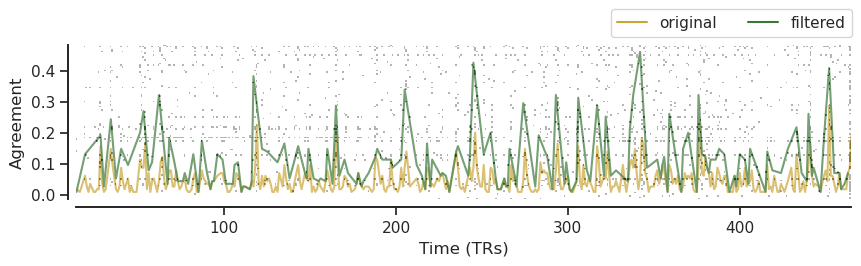

In [132]:
# agreement is the y axis
sns.set(font_scale=1, style='ticks')
fig, ax1 = plt.subplots(figsize=(10, 2))
# ax1.scatter(response_df['TR'], response_df['agreement'], color='r', s=1, alpha=0.5)

ax1r = ax1.twinx()
ax1r.matshow(buttons, cmap='binary', alpha=.3)
ax1r.set(yticks=[])

ax1.plot(event_agree_unfiltered_df['TR'], event_agree_unfiltered_df['agreement'], color='xkcd:ochre', linewidth=1.5, alpha=0.8, label="original")
ax1.plot(event_agree_df['TR'], event_agree_df['agreement'], color='xkcd:forest', linewidth=1.5, alpha=0.8, label="filtered")

ax1.set_xlabel("Time (TRs)")
ax1.set_ylabel("Agreement")
ax1.set(xlim=(14, n_trs))
# ax1.axvline(x=14, color='b', linestyle='--', label="Story Begins")
# ax1.axvline(x=465, color='g', linestyle='--', label="Story Ends")
# th = event_agree_df['agreement'].quantile(0.85)
# ax1.axhline(y=th, color='xkcd:crimson', linestyle='--', label="85% Quantile of Agreement")
# add label to the legend and put the legend to the center
ax1.legend(loc="upper right", bbox_to_anchor=(1.01, 1.28), ncol=2)
sns.despine(top=True, ax=ax1, offset={'left': 6, 'bottom': 6})

sns.despine(ax=ax1r, offset={'left': 6, 'bottom': 6})
plt.show()
fig.savefig(os.path.join(figure_dir, 'SM_01_event_agreement_filteration.svg'), transparent=True, bbox_inches='tight', dpi=300)


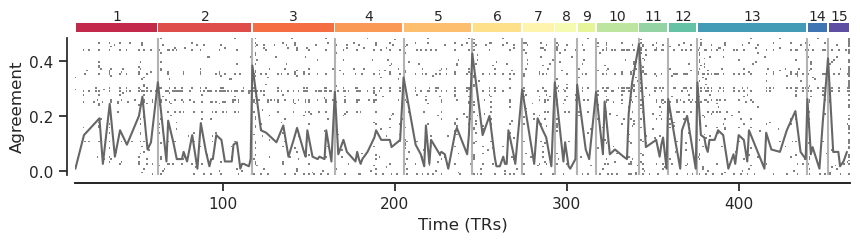

In [133]:
fig, axs = plt.subplots(2, 1, figsize=(10, 2),
                        gridspec_kw={'height_ratios': [1, 10]})
# Ensure the colormap is correctly applied
axs[0].matshow(np.repeat(events[np.newaxis, :], 5, axis=0), cmap='Spectral')
axs[0].set(xticks=[], yticks=[])
axs[0].spines[:].set_visible(False)
for i, mid in enumerate(mids):
    axs[0].annotate(f'{i + 1}', (mid, -2.5), ha='center',
                    size=10, annotation_clip=False)
axs[1].matshow(buttons, cmap='binary', alpha=.5)
axs[1].set(xlim=(14, n_trs), xlabel='Time (TRs)', ylabel='subjects',
        ylim=(0, n_sub), yticks=[])
axs[1].xaxis.set_ticks_position('bottom')
for b in boundaries[1:-1]:
    axs[1].axvline(b, c='.7')
ax1r = axs[1].twinx()
ax1r.plot(event_agree_df['TR'], event_agree_df['agreement'], c='.4')
# ax1r.plot(event_agree, c='.4')
ax1r.yaxis.tick_left()
axs[1].set_ylabel('Agreement')
axs[1].yaxis.set_label_coords(-.065, .5)
# ax1r.set(ylim=(0, .33))
plt.subplots_adjust(hspace=.04)
# set x axis limits
axs[0].set(xlim=(14, n_trs))
axs[1].set(xlim=(14, n_trs))
sns.despine(left=True, ax=axs[1], offset={'left': 6, 'bottom': 6})
sns.despine(ax=ax1r, offset={'left': 6, 'bottom': 6})

fig.savefig(os.path.join(figure_dir,'01_events_agreement.svg'), transparent=True, bbox_inches='tight', dpi=300)
plt.show()

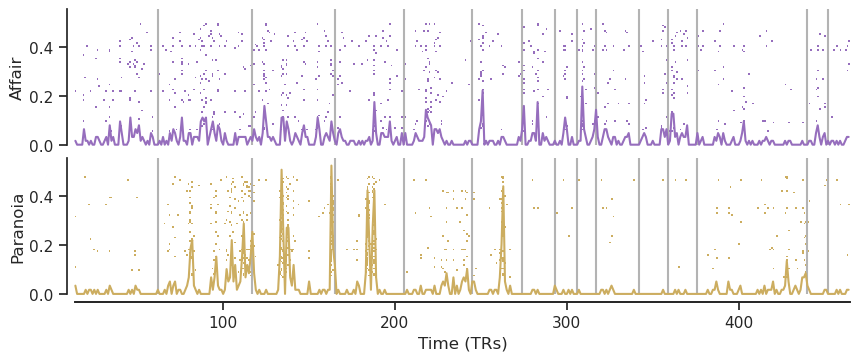

In [134]:
sns.set(font_scale=1, style='ticks')
fig, axs = plt.subplots(2, 1, figsize=(10, 3.7))

# Affair plot
aff_cmap = ListedColormap(['w', 'xkcd:deep lilac'])
axs[0].matshow(affair, cmap=aff_cmap)  # Slice the data to start from 14
for b in boundaries[1:-1]:
    if b >= 14:  # Only plot lines that are within the new xlim
        axs[0].axvline(b, c='.7')
ax0r = axs[0].twinx()
ax0r.plot(range(14, n_trs), aff_agree[14:], c='xkcd:deep lilac', clip_on=False)
ax0r.set_xlim(14, n_trs)  # Adjust the limits according to the new range
ax0r.yaxis.tick_left()
ax0r.set(ylim=(0, par_agree.max() + .03), xticks=[])
axs[0].set_ylabel('Affair')
axs[0].yaxis.set_label_coords(-.065, .5)
axs[0].set(xlim=(14, n_trs), ylim=(0, n_affair), yticks=[])
sns.despine(left=True, bottom=True, ax=axs[0], offset={'left': 6})
sns.despine(bottom=True, ax=ax0r, offset={'left': 6})

# Paranoia plot
par_cmap = ListedColormap(['w', 'xkcd:desert'])
axs[1].matshow(paranoia, cmap=par_cmap)  # Slice the data to start from 14
axs[1].xaxis.set_ticks_position('bottom')
for b in boundaries[1:-1]:
    if b >= 14:  # Only plot lines that are within the new xlim
        axs[1].axvline(b, c='.7')
axs[1].set(xlim=(14, n_trs), xlabel='Time (TRs)', ylabel='subjects',
           ylim=(0, n_paranoia), yticks=[])
ax1r = axs[1].twinx()
ax1r.plot(range(14, n_trs), par_agree[14:], c='xkcd:desert', clip_on=False)
ax1r.set_xlim(14, n_trs)
ax1r.yaxis.tick_left()
axs[1].set_ylabel('Paranoia')
axs[1].yaxis.set_label_coords(-.065, .5)
ax1r.set(ylim=(0, par_agree.max() + .03))

sns.despine(left=True, ax=axs[1], offset={'left': 6, 'bottom': 6})
sns.despine(ax=ax1r, offset={'left': 6, 'bottom': 6})
plt.subplots_adjust(hspace=.1)
fig.savefig(os.path.join(figure_dir, '02_evidence_agreement.svg'), transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [62]:
paranoia.shape

(59, 465)